In [190]:
import urllib
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
title_list = []
company_list = []
location_list = []
summary_list = []
reviews_list = []
snip_list = []

In [5]:
max_results_per_city = 500 # Set this to a high-value (5000) to generate more results. 
# # Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

# results = []

# number = 10
print max_results_per_city

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles']):
    print city
    for start in range(0, max_results_per_city, 10):
        url = 'http://www.indeed.com/jobs?q=data+scientist+$20,000%2B&l='+city+'&limit=100&radius=25&start='+str(start)
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        
        for row in soup.findAll('div',{'class':'row'}):
        
            title = row.find('a').get_text()
            company = row.find("span", {"class":"company"}).get_text()
            location = row.find("span", {"class":"location"}).get_text()
            summary = row.find("span", {"class":"summary"}).get_text()
            reviews = row.find("span", {"class":"slNoUnderline"})
            snip = row.find("nobr")
            
            title_list.append(title.strip())
            company_list.append(company.strip())
            location_list.append(location)
            summary_list.append(summary.strip())
            reviews_list.append(reviews)
            if snip is None:
                snip_list.append('')
            else:
                snip_list.append( snip.get_text())
        pass

500
Chicago
San+Francisco


AttributeError: 'NoneType' object has no attribute 'get_text'

In [12]:
##28698 records
### 26529 blank


2168

In [25]:
import pandas as pd

# Create a variable of the value of the columns
columns = {'title': title_list, 'company': company_list, 'salary':snip_list, 
           'location':location_list, 'summary':summary_list} 

# Create a dataframe from the columns variable
df = pd.DataFrame(columns)


In [26]:
df.salary.value_counts()

                              26793
$150,000 a year                  70
$180,000 a year                  60
$120,000 a year                  60
$75,000 - $100,000 a year        49
$160,000 a year                  40
$110,000 - $180,000 a year       39
$70,000 - $105,000 a year        38
$60 - $85 an hour                38
$14 - $19 an hour                38
$100,000 - $130,000 a year       32
$70,000 a year                   31
$50,000 a year                   31
$75,000 - $90,000 a year         30
$130,000 a year                  29
$25 - $35 an hour                29
$90,000 - $120,000 a year        29
$145,000 a year                  29
$75,000 - $95,000 a year         29
$125,000 - $175,000 a year       29
$70,000 - $100,000 a year        29
$60,000 - $90,000 a year         29
$80,000 - $110,000 a year        28
$125,000 a year                  21
$200,000 a year                  21
$20 an hour                      21
$105,000 a year                  21
$110,000 - $130,000 a year  

In [16]:
df2 = df[df["salary"]!=""]

In [19]:
df2 = df2.drop_duplicates()

In [20]:
df2.to_csv('salaries.csv', encoding='utf-8')

In [4]:
salaries = pd.read_csv('salaries.csv')

In [4]:
len(salaries) #216 after duplicates

216

In [5]:
# only keep salaries that have a year in them
salaries_final = salaries[salaries.salary.str.contains('a year')]
salaries_final

,Unnamed: 0,company,location,salary,summary,title
0,29,Workbridge Associates,"Chicago, IL","$100,000 - $130,000 a year",ETL and Data warehousing experience. A leading...,Data Scientist
1,30,Selby Jennings,"Chicago, IL","$135,000 - $165,000 a year",Data Scientist – Big Data/Artificial Intellige...,Data Scientist – Big Data/Artificial Intelligence
2,31,Smith Hanley Associates,"Chicago, IL","$75,000 - $90,000 a year",Statistical Research Scientist. Provide foreca...,Statistical Research Scientist
3,33,Smith Hanley Associates,"Evanston, IL","$60,000 - $75,000 a year",Present data findings to management and senior...,Statistical Analyst
4,46,Jobspring Partners,"Chicago, IL","$110,000 - $120,000 a year",Well we are looking for a skilled data scienti...,Data Scientist
6,53,Analytic Recruiting,"Chicago, IL","$140,000 a year",Take analytical objectives and define data req...,Lead Data Scientist
7,57,Silva Capital Management,"Chicago, IL 60611 (Near North Side area)","$125,000 a year",Silva Capital Management is looking for a juni...,Quantitative Analyst
8,69,InsightsNow Inc.,"Chicago, IL","$50,000 a year",Must have previous experience using Confirmit ...,Research Analyst
9,97,Smith Hanley Associates,"Chicago, IL","$130,000 - $165,000 a year",In this role you will use your advanced techni...,Senior Statistical Modeler
10,119,Jobspring Partners,"Chicago, IL","$175,000 - $200,000 a year",We are a global multi-strategy hedge fund with...,Financial Data Scientist (Machine Learning)


In [9]:
salaries_final.salary = salaries_final.salary.str.replace('$', '')
salaries_final.salary = salaries_final.salary.str.replace('a year', '')
salaries_final.salary = salaries_final.salary.str.replace(',', '')

In [7]:
salaries_final.to_csv('final_salaries.csv', encoding='utf-8')

In [10]:
def convert_salary(x):
    if '-' not in x:
        return float(x)
    else:
         return (float(x[: x.find('-')-1]) + float( x[ x.find('-')+2:]))/2
       
        
    
salaries_final['salary_updated'] = salaries_final.salary.apply(convert_salary)

/Users/kulwantsaluja/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
salaries_final




,Unnamed: 0,company,location,salary,summary,title,salary_updated
0,29,Workbridge Associates,"Chicago, IL",100000 - 130000,ETL and Data warehousing experience. A leading...,Data Scientist,115000.0
1,30,Selby Jennings,"Chicago, IL",135000 - 165000,Data Scientist – Big Data/Artificial Intellige...,Data Scientist – Big Data/Artificial Intelligence,150000.0
2,31,Smith Hanley Associates,"Chicago, IL",75000 - 90000,Statistical Research Scientist. Provide foreca...,Statistical Research Scientist,82500.0
3,33,Smith Hanley Associates,"Evanston, IL",60000 - 75000,Present data findings to management and senior...,Statistical Analyst,67500.0
4,46,Jobspring Partners,"Chicago, IL",110000 - 120000,Well we are looking for a skilled data scienti...,Data Scientist,115000.0
6,53,Analytic Recruiting,"Chicago, IL",140000,Take analytical objectives and define data req...,Lead Data Scientist,140000.0
7,57,Silva Capital Management,"Chicago, IL 60611 (Near North Side area)",125000,Silva Capital Management is looking for a juni...,Quantitative Analyst,125000.0
8,69,InsightsNow Inc.,"Chicago, IL",50000,Must have previous experience using Confirmit ...,Research Analyst,50000.0
9,97,Smith Hanley Associates,"Chicago, IL",130000 - 165000,In this role you will use your advanced techni...,Senior Statistical Modeler,147500.0
10,119,Jobspring Partners,"Chicago, IL",175000 - 200000,We are a global multi-strategy hedge fund with...,Financial Data Scientist (Machine Learning),187500.0


In [78]:
# We want to predict a binary variable - whether the salary was low or high. 
#Compute the median salary and create a new binary variable that is true 
#when the salary is high (above the median)¶
# We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a binary classification problem, by predicting two classes, HIGH vs LOW salary.
# While performing regression may be better, 
#performing classification may help remove some of the noise of the extreme salaries. 
#We don't have to choice the median as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.
# In fact, the ideal scenario may be to predict many levels of salaries,

salaries_final.salary_updated.describe()

count       150.000000
mean     121231.506667
std       44335.904726
min       50000.000000
25%       86510.000000
50%      116218.750000
75%      150000.000000
max      250000.000000
Name: salary_updated, dtype: float64

In [13]:
import numpy as np
median_salary = np.median(salaries_final.salary_updated)
median_salary

116218.75

In [15]:
#Compute the median salary and create a new binary variable that is true 
#when the salary is high (above the median)¶
median_salary = np.median(salaries_final.salary_updated)

def salary_type(x):
   
    if x > median_salary:
        return 1
    else:
        return 0
    
salaries_final['salary_type'] = salaries_final.salary_updated.apply(salary_type)

/Users/kulwantsaluja/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [99]:
salaries_final
# Thought experiment: What is the baseline accuracy for this model?
# It's a tossup. 50/50 since we have a baseline model

,Unnamed: 0,company,location,salary,summary,title,salary_updated,salary_type
0,29,Workbridge Associates,"Chicago, IL",100000 - 130000,ETL and Data warehousing experience. A leading...,Data Scientist,115000.0,0
1,30,Selby Jennings,"Chicago, IL",135000 - 165000,Data Scientist – Big Data/Artificial Intellige...,Data Scientist – Big Data/Artificial Intelligence,150000.0,1
2,31,Smith Hanley Associates,"Chicago, IL",75000 - 90000,Statistical Research Scientist. Provide foreca...,Statistical Research Scientist,82500.0,0
3,33,Smith Hanley Associates,"Evanston, IL",60000 - 75000,Present data findings to management and senior...,Statistical Analyst,67500.0,0
4,46,Jobspring Partners,"Chicago, IL",110000 - 120000,Well we are looking for a skilled data scienti...,Data Scientist,115000.0,0
6,53,Analytic Recruiting,"Chicago, IL",140000,Take analytical objectives and define data req...,Lead Data Scientist,140000.0,1
7,57,Silva Capital Management,"Chicago, IL 60611 (Near North Side area)",125000,Silva Capital Management is looking for a juni...,Quantitative Analyst,125000.0,1
8,69,InsightsNow Inc.,"Chicago, IL",50000,Must have previous experience using Confirmit ...,Research Analyst,50000.0,0
9,97,Smith Hanley Associates,"Chicago, IL",130000 - 165000,In this role you will use your advanced techni...,Senior Statistical Modeler,147500.0,1
10,119,Jobspring Partners,"Chicago, IL",175000 - 200000,We are a global multi-strategy hedge fund with...,Financial Data Scientist (Machine Learning),187500.0,1


In [115]:
mylist =['Senior', 'Sr.', 'Sr']

# frame.a.str.contains(pattern)
def is_in_list(x):
    word_list = x.split()
    for word in word_list:
        if word in mylist:
            return 1
    return 0
       
            
salaries_final['is_senior'] = salaries_final.title.apply(is_in_list)

In [116]:
salaries_final

,Unnamed: 0,company,location,salary,summary,title,salary_updated,salary_type,is_manager,city,...,cont_Redmond,cont_Redwood City,cont_San Francisco,cont_San Francisco Bay Area,cont_Santa Monica,cont_Seattle,cont_Union,cont_Walnut Creek,cont_Woodland Hills,is_senior
0,29,Workbridge Associates,"Chicago, IL",100000 - 130000,ETL and Data warehousing experience. A leading...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,30,Selby Jennings,"Chicago, IL",135000 - 165000,Data Scientist – Big Data/Artificial Intellige...,Data Scientist – Big Data/Artificial Intelligence,150000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,31,Smith Hanley Associates,"Chicago, IL",75000 - 90000,Statistical Research Scientist. Provide foreca...,Statistical Research Scientist,82500.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,33,Smith Hanley Associates,"Evanston, IL",60000 - 75000,Present data findings to management and senior...,Statistical Analyst,67500.0,0,0,Evanston,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,46,Jobspring Partners,"Chicago, IL",110000 - 120000,Well we are looking for a skilled data scienti...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,53,Analytic Recruiting,"Chicago, IL",140000,Take analytical objectives and define data req...,Lead Data Scientist,140000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,57,Silva Capital Management,"Chicago, IL 60611 (Near North Side area)",125000,Silva Capital Management is looking for a juni...,Quantitative Analyst,125000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,69,InsightsNow Inc.,"Chicago, IL",50000,Must have previous experience using Confirmit ...,Research Analyst,50000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,97,Smith Hanley Associates,"Chicago, IL",130000 - 165000,In this role you will use your advanced techni...,Senior Statistical Modeler,147500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,119,Jobspring Partners,"Chicago, IL",175000 - 200000,We are a global multi-strategy hedge fund with...,Financial Data Scientist (Machine Learning),187500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [117]:
manager_list =['Manager', 'Mgr.']

# frame.a.str.contains(pattern)
def is_manager(x):
    word_list = x.split()
    for word in word_list:
        if word in manager_list:
            return 1
    return 0
       
            
salaries_final['is_manager'] = salaries_final.title.apply(is_manager)

In [118]:
salaries_final

,Unnamed: 0,company,location,salary,summary,title,salary_updated,salary_type,is_manager,city,...,cont_Redmond,cont_Redwood City,cont_San Francisco,cont_San Francisco Bay Area,cont_Santa Monica,cont_Seattle,cont_Union,cont_Walnut Creek,cont_Woodland Hills,is_senior
0,29,Workbridge Associates,"Chicago, IL",100000 - 130000,ETL and Data warehousing experience. A leading...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,30,Selby Jennings,"Chicago, IL",135000 - 165000,Data Scientist – Big Data/Artificial Intellige...,Data Scientist – Big Data/Artificial Intelligence,150000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,31,Smith Hanley Associates,"Chicago, IL",75000 - 90000,Statistical Research Scientist. Provide foreca...,Statistical Research Scientist,82500.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,33,Smith Hanley Associates,"Evanston, IL",60000 - 75000,Present data findings to management and senior...,Statistical Analyst,67500.0,0,0,Evanston,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,46,Jobspring Partners,"Chicago, IL",110000 - 120000,Well we are looking for a skilled data scienti...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,53,Analytic Recruiting,"Chicago, IL",140000,Take analytical objectives and define data req...,Lead Data Scientist,140000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,57,Silva Capital Management,"Chicago, IL 60611 (Near North Side area)",125000,Silva Capital Management is looking for a juni...,Quantitative Analyst,125000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,69,InsightsNow Inc.,"Chicago, IL",50000,Must have previous experience using Confirmit ...,Research Analyst,50000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,97,Smith Hanley Associates,"Chicago, IL",130000 - 165000,In this role you will use your advanced techni...,Senior Statistical Modeler,147500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,119,Jobspring Partners,"Chicago, IL",175000 - 200000,We are a global multi-strategy hedge fund with...,Financial Data Scientist (Machine Learning),187500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [119]:
#create a dictionary

# test.split(',')[0]
# test.split(',')[1].strip().split(' ')[0]

salaries_final['city'] = salaries_final.location.apply(lambda x: x.split(',')[0])
salaries_final['state'] = salaries_final.location.apply(lambda x: x.split(',')[1].strip().split(' ')[0])

In [120]:
salaries_final.city.unique()

array(['Chicago', 'Evanston', 'Des Plaines', 'Deerfield', 'Northbrook',
       'San Francisco', 'San Francisco Bay Area', 'Oakland', 'Brisbane',
       'Redwood City', 'Walnut Creek', 'Berkeley', 'New York',
       'Long Island City', 'Union', 'Orangeburg', 'Brooklyn',
       'Santa Monica', 'Los Angeles', 'Anaheim', 'Pasadena',
       'Woodland Hills', 'Seattle', 'Redmond', 'Bellevue', 'Austin'], dtype=object)

In [121]:
salaries_final.state.unique()

array(['IL', 'CA', 'NY', 'NJ', 'WA', 'TX'], dtype=object)

In [122]:
city_dummies = pd.get_dummies(salaries_final.city, prefix='cont').iloc[:,1:]
salaries_final = pd.concat([salaries_final,city_dummies],axis=1)
# # create dummy variables for 'continent' and exclude first dummy column
# continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]
# d
# # concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
# drinks = pd.concat([drinks, continent_dummies], axis=1)


In [80]:
state_dummies = pd.get_dummies(salaries_final.state, prefix='cont').iloc[:,1:]
salaries_final = pd.concat([salaries_final, state_dummies], axis=1)

# city_dummies = pd.get_dummies(salaries_final.city, prefix='cont').iloc[:,1:]
# salaries_final = pd.concat([salaries_final,city_dummies],axis=1)

In [123]:
salaries_final.columns

Index([u'Unnamed: 0', u'company', u'location', u'salary', u'summary', u'title',
       u'salary_updated', u'salary_type', u'is_manager', u'city', u'state',
       u'cont_Austin', u'cont_Bellevue', u'cont_Berkeley', u'cont_Brisbane',
       u'cont_Brooklyn', u'cont_Chicago', u'cont_Deerfield',
       u'cont_Des Plaines', u'cont_Evanston', u'cont_Long Island City',
       u'cont_Los Angeles', u'cont_New York', u'cont_Northbrook',
       u'cont_Oakland', u'cont_Orangeburg', u'cont_Pasadena', u'cont_Redmond',
       u'cont_Redwood City', u'cont_San Francisco',
       u'cont_San Francisco Bay Area', u'cont_Santa Monica', u'cont_Seattle',
       u'cont_Union', u'cont_Walnut Creek', u'cont_Woodland Hills',
       u'is_senior', u'cont_Austin', u'cont_Bellevue', u'cont_Berkeley',
       u'cont_Brisbane', u'cont_Brooklyn', u'cont_Chicago', u'cont_Deerfield',
       u'cont_Des Plaines', u'cont_Evanston', u'cont_Long Island City',
       u'cont_Los Angeles', u'cont_New York', u'cont_Northbrook',
 

In [124]:
salaries_final

,Unnamed: 0,company,location,salary,summary,title,salary_updated,salary_type,is_manager,city,...,cont_Pasadena,cont_Redmond,cont_Redwood City,cont_San Francisco,cont_San Francisco Bay Area,cont_Santa Monica,cont_Seattle,cont_Union,cont_Walnut Creek,cont_Woodland Hills
0,29,Workbridge Associates,"Chicago, IL",100000 - 130000,ETL and Data warehousing experience. A leading...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,Selby Jennings,"Chicago, IL",135000 - 165000,Data Scientist – Big Data/Artificial Intellige...,Data Scientist – Big Data/Artificial Intelligence,150000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31,Smith Hanley Associates,"Chicago, IL",75000 - 90000,Statistical Research Scientist. Provide foreca...,Statistical Research Scientist,82500.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,Smith Hanley Associates,"Evanston, IL",60000 - 75000,Present data findings to management and senior...,Statistical Analyst,67500.0,0,0,Evanston,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46,Jobspring Partners,"Chicago, IL",110000 - 120000,Well we are looking for a skilled data scienti...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,53,Analytic Recruiting,"Chicago, IL",140000,Take analytical objectives and define data req...,Lead Data Scientist,140000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,57,Silva Capital Management,"Chicago, IL 60611 (Near North Side area)",125000,Silva Capital Management is looking for a juni...,Quantitative Analyst,125000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,69,InsightsNow Inc.,"Chicago, IL",50000,Must have previous experience using Confirmit ...,Research Analyst,50000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,97,Smith Hanley Associates,"Chicago, IL",130000 - 165000,In this role you will use your advanced techni...,Senior Statistical Modeler,147500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,119,Jobspring Partners,"Chicago, IL",175000 - 200000,We are a global multi-strategy hedge fund with...,Financial Data Scientist (Machine Learning),187500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
df = salaries_final
df

,Unnamed: 0,company,location,salary,summary,title,salary_updated,salary_type,is_manager,city,...,cont_Pasadena,cont_Redmond,cont_Redwood City,cont_San Francisco,cont_San Francisco Bay Area,cont_Santa Monica,cont_Seattle,cont_Union,cont_Walnut Creek,cont_Woodland Hills
0,29,Workbridge Associates,"Chicago, IL",100000 - 130000,ETL and Data warehousing experience. A leading...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,Selby Jennings,"Chicago, IL",135000 - 165000,Data Scientist – Big Data/Artificial Intellige...,Data Scientist – Big Data/Artificial Intelligence,150000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31,Smith Hanley Associates,"Chicago, IL",75000 - 90000,Statistical Research Scientist. Provide foreca...,Statistical Research Scientist,82500.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,Smith Hanley Associates,"Evanston, IL",60000 - 75000,Present data findings to management and senior...,Statistical Analyst,67500.0,0,0,Evanston,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46,Jobspring Partners,"Chicago, IL",110000 - 120000,Well we are looking for a skilled data scienti...,Data Scientist,115000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,53,Analytic Recruiting,"Chicago, IL",140000,Take analytical objectives and define data req...,Lead Data Scientist,140000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,57,Silva Capital Management,"Chicago, IL 60611 (Near North Side area)",125000,Silva Capital Management is looking for a juni...,Quantitative Analyst,125000.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,69,InsightsNow Inc.,"Chicago, IL",50000,Must have previous experience using Confirmit ...,Research Analyst,50000.0,0,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,97,Smith Hanley Associates,"Chicago, IL",130000 - 165000,In this role you will use your advanced techni...,Senior Statistical Modeler,147500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,119,Jobspring Partners,"Chicago, IL",175000 - 200000,We are a global multi-strategy hedge fund with...,Financial Data Scientist (Machine Learning),187500.0,1,0,Chicago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
y = salaries_final.salary_type

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
rf = RandomForestClassifier()
le = LabelEncoder()
df['location_num'] = le.fit_transform(df.location)
sorted(df.location_num.unique())
# data['location_num'] = le.fit_transform(data.location)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [127]:
y =   salaries_final.salary_type
# X = salaries_final[['is_senior', 'is_manager']]

X = salaries_final[['is_senior', 'is_manager', 'cont_Austin', 'cont_Bellevue', 'cont_Berkeley',
       'cont_Brisbane', 'cont_Brooklyn', 'cont_Chicago', 'cont_Deerfield',
       'cont_Des Plaines', 'cont_Evanston', 'cont_Long Island City',
       'cont_Los Angeles', 'cont_New York', 'cont_Northbrook',
       'cont_Oakland', 'cont_Orangeburg', 'cont_Pasadena', 'cont_Redmond',
       'cont_Redwood City', 'cont_San Francisco',
       'cont_San Francisco Bay Area', 'cont_Santa Monica', 'cont_Seattle',
       'cont_Union', 'cont_Walnut Creek', 'cont_Woodland Hills', 'cont_IL',
       'cont_NJ', 'cont_NY', 'cont_TX', 'cont_WA']]

/Users/kulwantsaluja/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:1214: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 57
  raise KeyError('%s not in index' % objarr[mask])


IndexError: index 52 is out of bounds for axis 1 with size 32

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
rf = RandomForestClassifier()
le = LabelEncoder()
# data['location_num'] = le.fit_transform(data.location)

In [138]:
M = df.location_num.reshape(-1, 1)
type(M)
df.location_num
# y = data.high_salary
# rf.fit(X, y)
# print rf.score(X, y)


0       9
1       9
2       9
3      16
4       9
6       9
7      13
8       9
9       9
10      9
12      9
14     15
15      9
16      9
17      9
18      9
19      9
20      9
21      9
22     14
23      9
24      9
25      9
26     11
29      9
30      9
31      9
32     16
33     12
34      9
       ..
140    18
142    18
145    18
146    18
148    18
149    18
150     0
153    29
154    18
156    18
158    18
159    41
160    37
161    37
163    37
164    30
165    37
166    37
167    38
168    37
171     4
174     4
177    37
181     5
185    37
191     2
192     1
201     1
207     3
215     1
Name: location_num, dtype: int64

In [102]:
X.head()

NameError: name 'X' is not defined

In [118]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

In [117]:

# fit a classification tree with max_depth=3 on all data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
dt = DecisionTreeClassifier(class_weight='balanced')
s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3))

Decision Tree Score:	0.573 ± 0.082


In [120]:

s = cross_val_score(rfc, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random_Forest", s.mean().round(3), s.std().round(3))

Decision Tree Score:	0.553 ± 0.093


In [126]:
rfc = RandomForestClassifier(max_depth=3)
s = cross_val_score(rfc, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random_Forest", s.mean().round(3), s.std().round(3))

Random_Forest Score:	0.553 ± 0.074


In [127]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

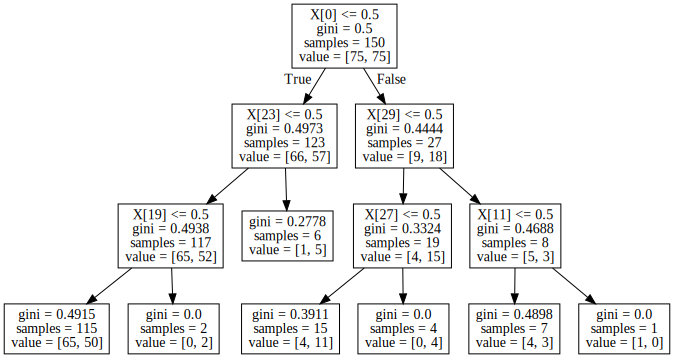

In [128]:
import graphviz

export_graphviz(dt, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [136]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()



,importance
cont_NY,0.257334
is_senior,0.243372
cont_Seattle,0.229671
cont_Redwood City,0.167107
cont_IL,0.059753


In [140]:
rfc.fit(X,y)

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
is_senior,0.208932
cont_Seattle,0.137573
cont_Redwood City,0.089399
cont_Santa Monica,0.062502
is_manager,0.060191


In [141]:
s = cross_val_score(rfc, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random_Forest", s.mean().round(3), s.std().round(3))

Random_Forest Score:	0.58 ± 0.086


In [145]:
# Use Random Forest for Logistic Regression
X_lite = X[['is_senior', 'cont_NY', 'cont_Seattle']]

In [147]:
rfc.fit(X_lite,y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
s = cross_val_score(rfc, X_lite, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random_Forest", s.mean().round(3), s.std().round(3))


Random_Forest Score:	0.56 ± 0.075


In [149]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_lite.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
is_senior,0.413061
cont_NY,0.293580
cont_Seattle,0.293359


In [150]:
# Use logistic regression here
from sklearn.preprocessing import StandardScaler
X_lite = StandardScaler().fit_transform(X_lite)

In [161]:
from sklearn.linear_model import LogisticRegression

#Define the model (we will use default parameters here)
model = LogisticRegression()


#Set up your data with a train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lite,y)

#Fit our model to our training data
model.fit(X_train,y_train)

#Evaluate our model using "score" - taking in the X_test data, predicting y-values behind the scenes, and comparing
#those predicted results to the true y_test observations
model.score(X_test,y_test)

y_pred = model.predict(X_test)

In [162]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  2],
       [18,  3]])

In [202]:
from nltk import ConfusionMatrix
ConfusionMatrix(list(y_test), list(y_pred))


<ConfusionMatrix: 23/38 correct>

In [203]:
metrics.confusion_matrix(y_test, y_pred)

array([[16,  3],
       [12,  7]])

In [207]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred))
# Not good. Start changing thresholds. Start building models. 

0.368421052632
0.368421052632


In [163]:
X_lite.shape

(150, 3)

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



In [171]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
   ]
scores = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

scores

[0.55263157894736847,
 0.47368421052631576,
 0.47368421052631576,
 0.47368421052631576,
 0.47368421052631576]

In [ ]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_lite, y)

# predict the response for new observations
knn.predict(X_new)

In [172]:
from sklearn.grid_search import GridSearchCV

In [173]:
k_range = list(range(1, 31))

In [186]:
knn = KNeighborsClassifier()

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [187]:

# fit the grid with data
grid.fit(X_lite, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [178]:
grid.grid_scores_

[mean: 0.54667, std: 0.07916, params: {'n_neighbors': 1},
 mean: 0.57333, std: 0.07035, params: {'n_neighbors': 2},
 mean: 0.54667, std: 0.12308, params: {'n_neighbors': 3},
 mean: 0.57333, std: 0.13323, params: {'n_neighbors': 4},
 mean: 0.56667, std: 0.13135, params: {'n_neighbors': 5},
 mean: 0.58000, std: 0.12169, params: {'n_neighbors': 6},
 mean: 0.58000, std: 0.12169, params: {'n_neighbors': 7},
 mean: 0.56667, std: 0.11345, params: {'n_neighbors': 8},
 mean: 0.56667, std: 0.13135, params: {'n_neighbors': 9},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 10},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 11},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 12},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 13},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 14},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 15},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 16},
 mean: 0.55333, std: 0.12219, params: {'n_neighbors': 17},
 mean:

{'n_neighbors': 1}
[ 0.625       0.625       0.625       0.5         0.5         0.5
  0.42857143  0.57142857  0.64285714  0.42857143]
0.546666666667


In [180]:

# examine the best model
# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_
grid.best_score_

0.57999999999999996

In [181]:
grid.best_params_

{'n_neighbors': 6}

In [182]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [196]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(X_lite,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [197]:
from sklearn.cross_validation import train_test_split
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_lite,y)

#Set up your data with a train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Fit our model to our training data
model.fit(X_train,y_train)

#Evaluate our model using "score" - taking in the X_test data, predicting y-values behind the scenes, and comparing
#those predicted results to the true y_test observations
model.score(X_test,y_test)


0.60526315789473684

In [199]:
y_pred = model.predict(X_test)


In [200]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  3],
       [12,  7]])

In [ ]:
from nltk import ConfusionMatrix
print ConfusionMatrix(list(y_test), list(preds))

In [191]:
### Principal Components because why not? 

from sklearn.decomposition import PCA 
from sklearn import metrics


In [193]:
covMat1 = np.cov(X_lite.T)
eigenValues, eigenVectors = np.linalg.eig(covMat1)
eigenValues

array([ 1.28098844,  0.93742331,  0.80172248])

In [194]:
eigenVectors

array([[ 0.44961468, -0.89254275, -0.03484347],
       [-0.62792575, -0.34357667,  0.69832966],
       [ 0.63526048,  0.29210016,  0.7149277 ]])

In [195]:
covMat2 = np.cov(X.T)
eigenValues_whole, eigenVectors_whole = np.linalg.eig(covMat2)
eigenValues_whole

array([  5.71345028e-01,   2.68770532e-01,   1.43490562e-01,
         1.18273463e-01,   7.80737038e-02,   6.38871557e-02,
         4.33068045e-02,   3.19794709e-02,   2.85810696e-02,
         2.46478292e-02,   1.98434037e-02,   4.48246085e-04,
         1.51991799e-02,   1.31544001e-02,   6.42974678e-03,
         1.00842006e-02,   8.27568181e-03,   9.22391472e-03,
         9.10193863e-03,   1.34228188e-02,   2.24989724e-16,
        -5.05073113e-17,   1.25093884e-17,  -2.08298332e-18,
         1.09128052e-19,   6.71140940e-03,   6.71140940e-03,
         6.71140940e-03,   6.71140940e-03,   6.71140940e-03,
         6.71140940e-03,   6.71140940e-03])

### Dumb Idea